The challenge we choose is VAST 2016 Mini Challenge 1.
To solve this problem, we should do text processing and visulization.
The major task relevant to machine learning algorithm is to classify the text data.
Since there is no training dataset, clustering should be our choice.
By dividing those text data into many clusters, we can find information of specific topic to reveal the truth.
So, in that home work, we test different clustering algorithm on text data.

In [187]:
from bokeh.plotting import figure
from bokeh.io import push_notebook, output_notebook, show
import math
from bokeh.models.widgets import Select
from bokeh.models.glyphs import Circle
from bokeh.layouts import column
from re import match
import numpy as np
from sklearn import cluster, datasets
from bokeh.models import HoverTool, PanTool, WheelZoomTool, ColumnDataSource
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact
import ipywidgets as widgets
import pandas as pd
# from word_cloud_master.wordcloud import wordcloud
import networkx as nx
import matplotlib as mpl
#import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

#self-defined module
import data_parser

output_notebook()


Loading BokehJS ...

In [188]:
#employees_dic = data_parser.convert_dic_list_to_dic(employee_dic_list, "EmailAddress")
hotel_review_df = data_parser.parse_csv_data('./hw5_data/dataset-CalheirosMoroRita-2017.csv', 'ISO-8859-1')
hotel_review_feature_names = data_parser.extract_column_names(hotel_review_df)
hotel_review_list = data_parser.build_dic(hotel_review_df, hotel_review_feature_names)['Review']
#print(len(hotel_review_list))
#remove stop default stop words from the reviews
count_vect = CountVectorizer(stop_words = 'english')
hotel_review_train_counts = count_vect.fit_transform(hotel_review_list)
feat = count_vect.get_feature_names()

from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer().fit(hotel_review_train_counts)
X_train_tf = tf_transformer.transform(hotel_review_train_counts)

In [189]:
# #employees_dic = data_parser.convert_dic_list_to_dic(employee_dic_list, "EmailAddress")
# hotel_review_df = data_parser.parse_csv_data('./hw5_data/SMSSpamCollection.csv', 'ISO-8859-1')
# hotel_review_feature_names = data_parser.extract_column_names(hotel_review_df)
# hotel_review_list = data_parser.build_dic(hotel_review_df, hotel_review_feature_names)['b']
# #print(len(hotel_review_list))
# #remove stop default stop words from the reviews
# count_vect = CountVectorizer(stop_words = 'english')
# hotel_review_train_counts = count_vect.fit_transform(hotel_review_list)
# feat = count_vect.get_feature_names()

# from sklearn.feature_extraction.text import TfidfTransformer
# tf_transformer = TfidfTransformer().fit(hotel_review_train_counts)
# X_train_tf = tf_transformer.transform(hotel_review_train_counts)

In [190]:
def draw_cluster(cluster_labels, X_train_tf, feat):
    word_val = []
    for i in range(num_clusters):
        word_val.append([0 for i in range(len(feat))])

    tfidf = X_train_tf.todense().tolist()
    for i in range(len(cluster_labels)):
        for j in range(len(feat)):
            word_val[cluster_labels[i]][j] += tfidf[i][j]

    # Pick 5 most important words in each cluster
    max_num = 5
    word_idx = []
    word_labels = []
    for i in range(num_clusters):
        word_idx.append([])
    for i in range(num_clusters):
        arr = list(word_val[i])
        for j in range(max_num):
            idx = arr.index(max(arr))
            word_idx[i].append(idx)
            arr[idx] = 0
    for i in range(num_clusters):
        s = ''
        for j in word_idx[i]:
            s += feat[j]
            s += ' / '
        word_labels.append(s)

    # 
    from sklearn.metrics.pairwise import cosine_similarity
    dist = 1 - cosine_similarity(X_train_tf)

    from sklearn.manifold import MDS
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
    pos = mds.fit_transform(dist)
    xs, ys = pos[:, 0], pos[:, 1]

    cl = ["blue","red","yellow","purple","green","cyan","darkred","indigo","orange","pink"]
    pos = []
    for i in range(num_clusters):
        pos.append([])
    for i in range(num_clusters):
        pos[i].append([])
        pos[i].append([])
    for i in range(len(cluster_labels)):
        L = cluster_labels[i]
        pos[L][0].append(xs[i])
        pos[L][1].append(ys[i])
    plot = figure()
    for i in range(num_clusters):
        legend = word_labels[i]
        plot.circle(pos[i][0], pos[i][1], size=10, color=cl[i], legend = legend)
    show(plot)

In [191]:
from sklearn.cluster import KMeans
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(X_train_tf)
cluster_labels = km.labels_

draw_cluster(cluster_labels, X_train_tf, feat)

In [192]:
# from sklearn.cluster import DBSCAN
# db = DBSCAN().fit(X_train_tf)
# print(db.labels_)
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters = 5)

sc.fit(X_train_tf)
#print(sc.labels_)
draw_cluster(sc.labels_, X_train_tf, feat)

In [193]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 5)

ac.fit(X_train_tf.toarray())
#print(sc.labels_)
draw_cluster(ac.labels_, X_train_tf, feat)

## Plots for the example dataset of hotel reviews
We found an example dataset about reviews to a hotel online. We used clustering algorithm to reveal the clusters of reviews. There are three clustering algorithms we used, KMeans, SpectralClustering and AgglomerativeClustering.

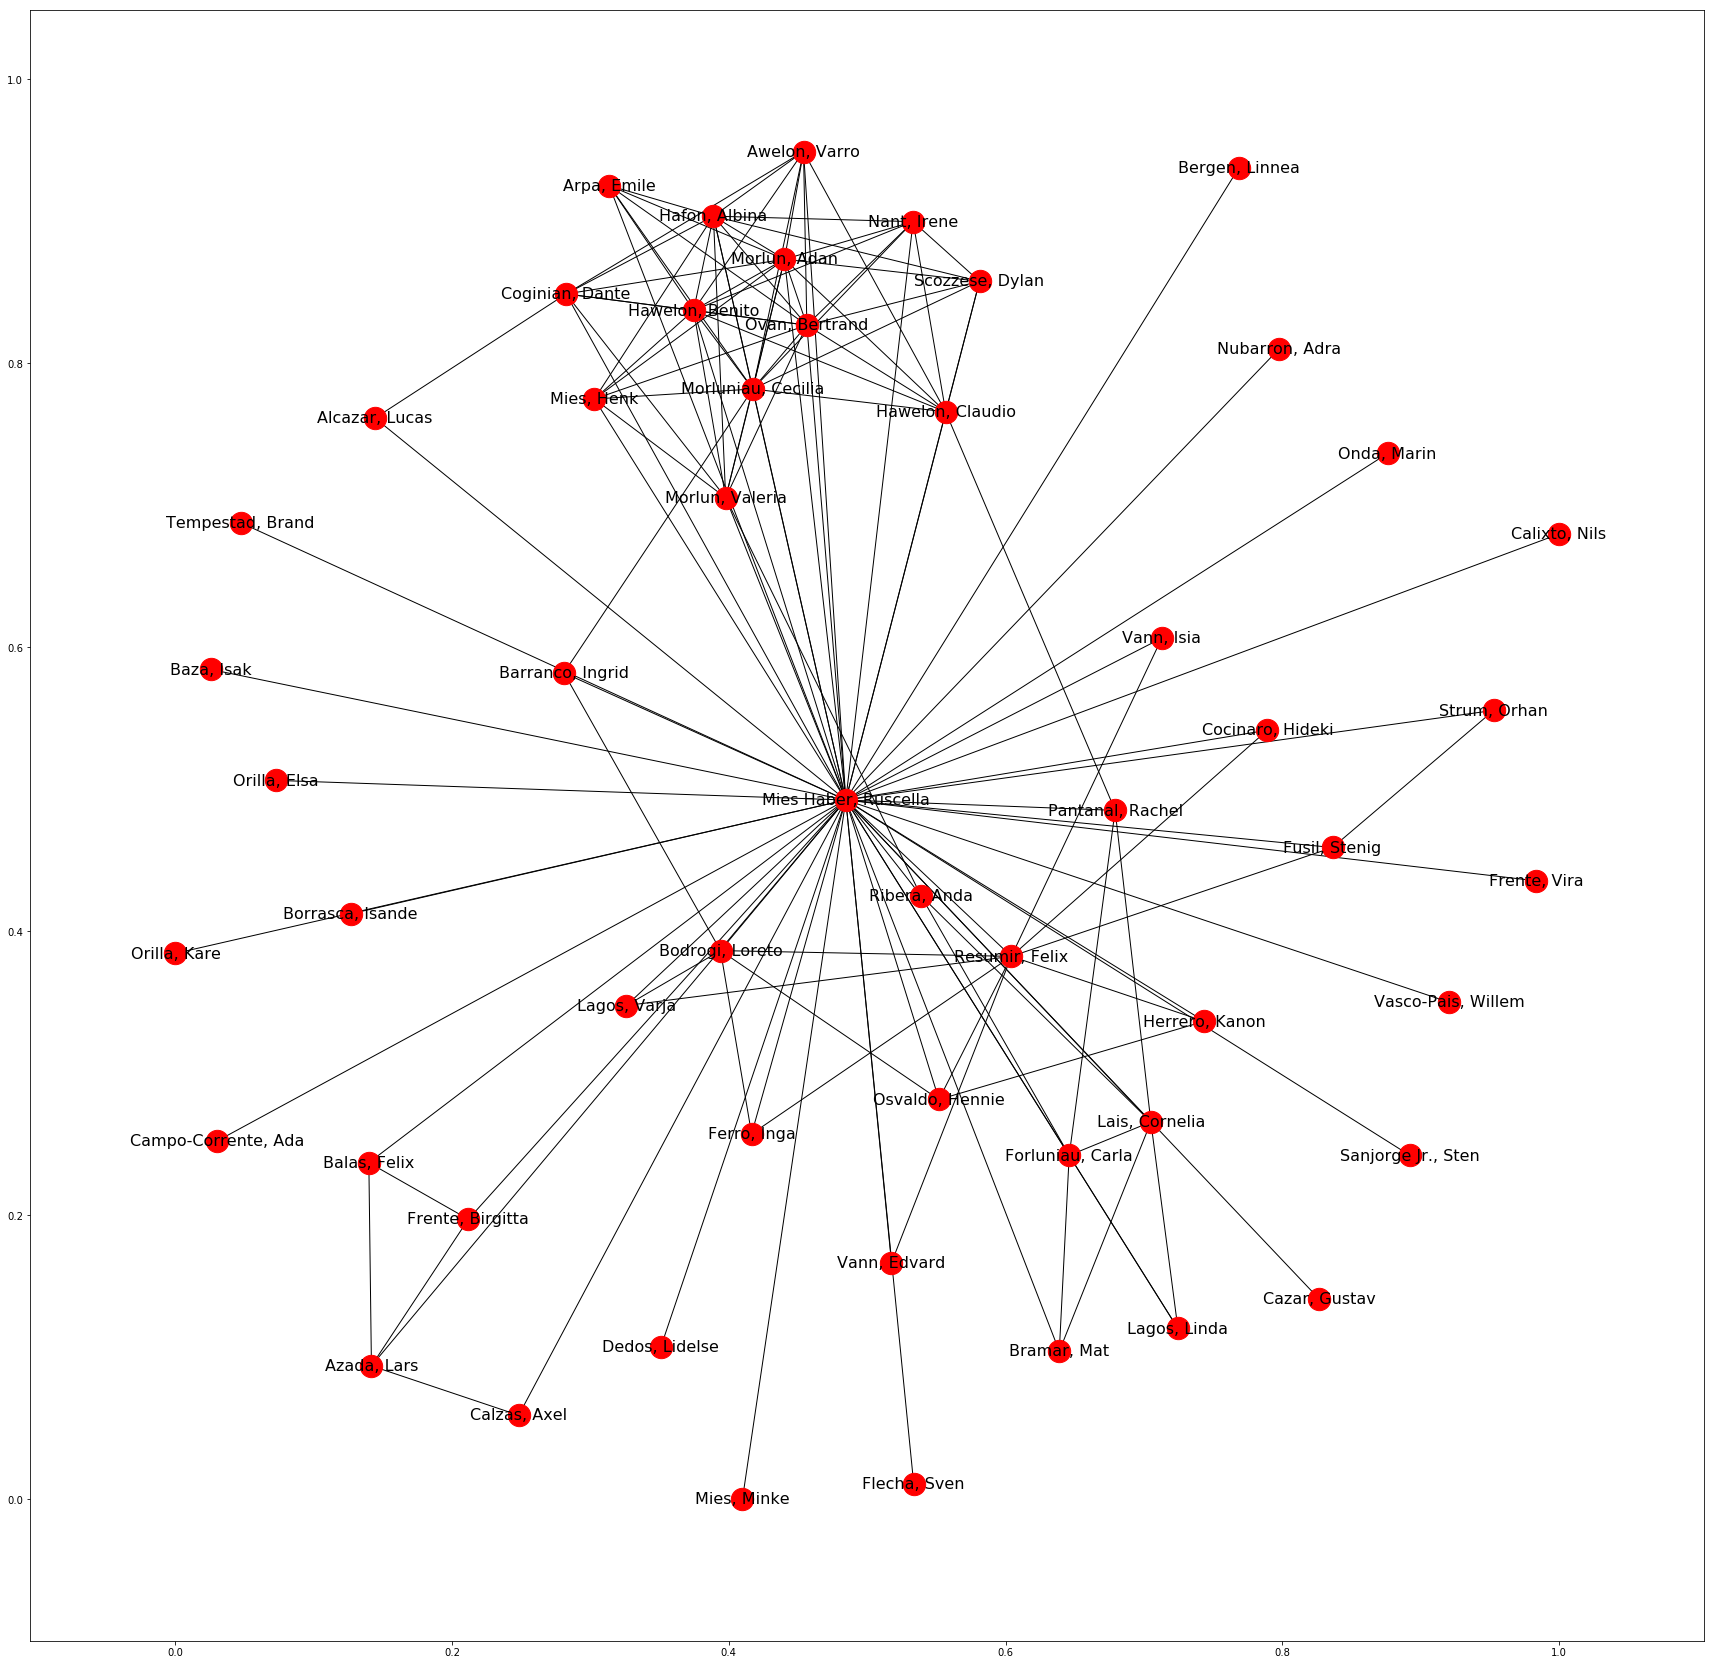

In [194]:
#import excel datasets, and convert them into dataframe
employee_data_df = data_parser.parse_excel_data('./data/EmployeeRecords.xlsx', 'Employee Records')
employee_feature_names = data_parser.extract_column_names(employee_data_df)
employee_data_dic = data_parser.build_dic(employee_data_df, employee_feature_names)
employee_dic_list = data_parser.build_row_dic_list(employee_data_df, employee_feature_names)
#print(employee_dic_list)
#Filter out the employees with MilitaryServiceBranch
#We suspect it is more possible for those employees with military training to be..
employees_dic = data_parser.convert_dic_list_to_dic(employee_dic_list, "EmailAddress")
military_employes_list = []
non_military_employes_list = []
for employee in employee_dic_list:
    if not pd.isnull(employee['MilitaryServiceBranch']):
        military_employes_list.append(employee)
    else:
        non_military_employes_list.append(employee)
        
G = nx.DiGraph()
military_set = set()
military_node_labels = {}
index = 0
for employee in military_employes_list:
    G.add_node(employee['EmailAddress'].strip(), node_type="email", details=employee)
    military_node_labels[index] = employee['LastName'] + ", " + employee['FirstName']
    military_set.add(employee['EmailAddress'].strip())



email_record_df = data_parser.parse_csv_data('./data/email_headers.csv', 'ISO-8859-1')
email_record_feature_names = data_parser.extract_column_names(email_record_df)
email_record_dic_list = data_parser.build_row_dic_list(email_record_df, email_record_feature_names)
#print(email_record_dic_list)
for email_record in email_record_dic_list:
    is_military = email_record['From'] in military_set
    is_date = "1/6/2014" in email_record['Date']
    if is_date and is_military:
        #print(email_record['Date'])
        for to in email_record['To'].split(','):
            #if is_military:
            G.add_edge(email_record['From'], to.strip(), rel_type="send email to", details=email_record)
#             elif to.strip() in military_set:
#                 G.add_edge(email_record['From'], to.strip(), rel_type="send email to", details=email_record)
# store locally to allow faster loading
nx.write_adjlist(G,"pp_graph.adjlist")

plt.figure(figsize=(30,30))
subgraphs = [g for g in nx.connected_component_subgraphs(G.to_undirected())]
pos = nx.spring_layout(subgraphs[0])

node_labels = {}
for node in subgraphs[0].nodes():
    node_labels[node] = employees_dic[node]['LastName'] + ", " + employees_dic[node]['FirstName']

#print(node_labels)
nx.draw_networkx_nodes(subgraphs[0], pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_labels(subgraphs[0],pos,node_labels,font_size=16)
nx.draw_networkx_edges(subgraphs[0], pos, edgelist=subgraphs[0].edges(), arrows=True, with_labels=True)
plt.show()



## The graphs above shows the relationships in Email records.
Since we need to find the leader in the secret group, it would be better to use graph as a kind of visualization tool to display the relationships among employees.